# 1. 얼굴 및 눈 감지를 위해 OpenCV Haar 캐스케이드 구성

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### cascade 파일읽기

In [65]:
face_cascade = cv2.CascadeClassifier("./data/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./data/haarcascade_eye.xml")

print(face_cascade, eye_cascade)

<CascadeClassifier 000002948AC495B0> <CascadeClassifier 000002948BFD2010>


### 얼굴 이미지 데이터 읽기

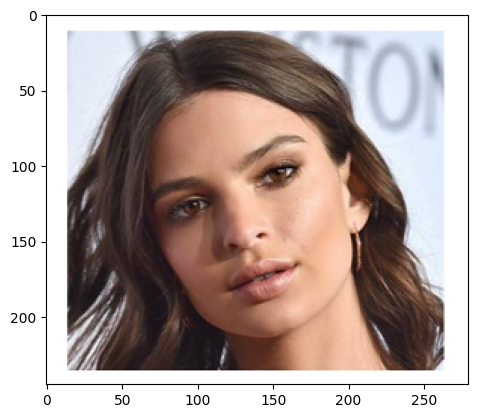

In [66]:
face_image = cv2.imread("./data/face01.png")
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
face_image_copy = face_image.copy()


plt.imshow(face_image)
plt.show()

### 2. 얼굴 이미지 바운딩 박스처리 : 케이스케이드 경우는 그레이 스케일 이미지에서만 작동!!!

[[ 49  48 160 160]]
얼굴 객체 인식 좌표 :  49 48 160 160


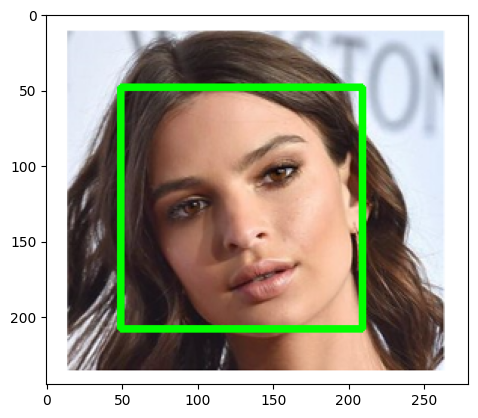

In [67]:
face_gray_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)

face_box_info = face_cascade.detectMultiScale(face_gray_image, 1.1, 4)

print(face_box_info)
for (x,y,w,h) in face_box_info :
    print("얼굴 객체 인식 좌표 : "  ,x,y,w,h)
    cv2.rectangle(face_image, (x,y), (x+w, y+h), (0, 255, 0), 3)
    plt.imshow(face_image)
    plt.show()

### 3. 눈 감지

[[30 63 33 33]
 [81 37 42 42]]
0 30 63 33 33
1 81 37 42 42


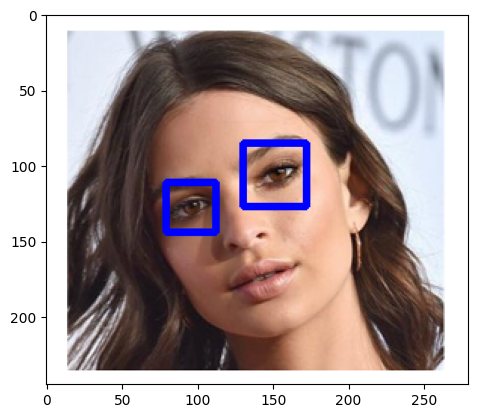

In [68]:
roi_gray = face_gray_image[y:(y+h), x:(x+w)]
roi_color = face_image_copy[y:(y+h), x:(x+w)]

eyes_box_info = eye_cascade.detectMultiScale(roi_gray)

print(eyes_box_info)

for i, (ex, ey, ew, eh) in enumerate(eyes_box_info):
    print(i,ex, ey, ew, eh )
    if i == 0 :
        eye_1 = (ex, ey, ew, eh)
    elif i == 1 :
        eye_2 = (ex, ey, ew, eh)

    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,0,255), 3)
plt.imshow(face_image_copy)
plt.show()

### 얼굴 정렬-01

In [69]:
print(eye_1[0],eye_2[0])
if eye_1[0] < eye_2[0] :
    left_eye = eye_1
    right_eye = eye_2
else : 
    left_eye = eye_2
    right_eye = eye_2

print(left_eye, right_eye)

30 81
(30, 63, 33, 33) (81, 37, 42, 42)


left eye center 좌표 :  46 79
right eye center 좌표 :  102 58


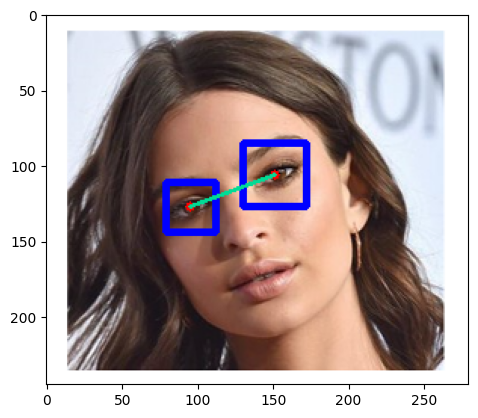

In [70]:
left_eye_center = (int(left_eye[0] + (left_eye[2]/2)), int(left_eye[1] + (left_eye[3] /2)))


left_eye_center_x = left_eye_center[0]
left_eye_center_y = left_eye_center[1]

print("left eye center 좌표 : " , left_eye_center_x, left_eye_center_y)

right_eye_center =  (int(right_eye[0] + (right_eye[2]/2)), int(right_eye[1] + (right_eye[3] /2)))
right_eye_center_x = right_eye_center[0]
right_eye_center_y = right_eye_center[1]

print("right eye center 좌표 : " , right_eye_center_x, right_eye_center_y)

cv2.circle(roi_color, left_eye_center, 3 , (255,0,0), -1)
cv2.circle(roi_color, right_eye_center, 3 , (255,0,0), -1)
cv2.line(roi_color, left_eye_center, right_eye_center, (0,220,150) ,2)


plt.imshow(face_image_copy)
plt.show()

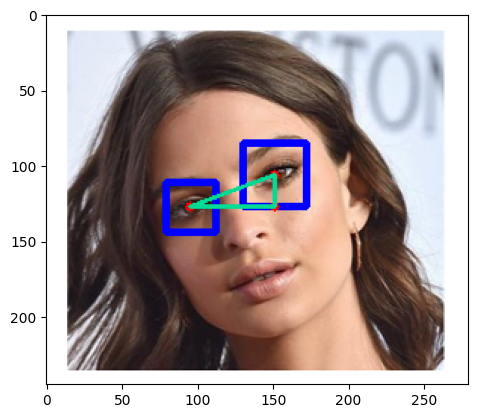

In [71]:
if left_eye_center_y > right_eye_center_y :
    A = (right_eye_center_x, left_eye_center_y)
    direction = -1

else : 
    A = (left_eye_center_x, right_eye_center_y)
    direction = 1

cv2. circle(roi_color, A, 3, (255,0,0),-1)
cv2.line(roi_color, left_eye_center, A, (0,220,150) ,2)
cv2.line(roi_color, right_eye_center, A, (0,220,150) ,2)


plt.imshow(face_image_copy)
plt.show()

### 각도 계산

In [72]:
delta_x = right_eye_center_x - left_eye_center_x
delta_y = right_eye_center_y - left_eye_center_y

angle = np.arctan(delta_y/ delta_x)
angle = (angle * 180) / np.pi
print(angle)

-20.556045219583464


### 이미지를 각도 세타 만큼 회전

이미지 height, width 값>>  245 280
image center values >>  (140, 122)
[[  0.93632918  -0.35112344  51.75097501]
 [  0.35112344   0.93632918 -41.38944149]]


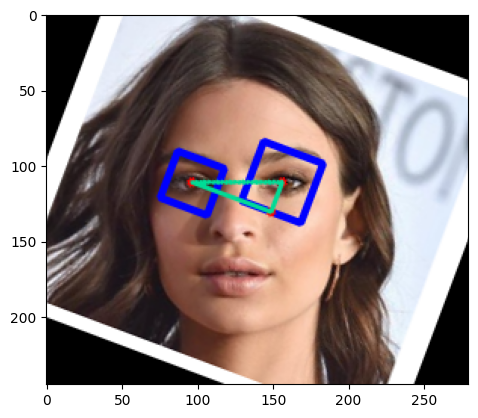

In [73]:
height, width, _ = face_image_copy.shape
print("이미지 height, width 값>> " , height, width)

image_center = (width // 2, height//2)
print("image center values >> ", image_center)

M = cv2.getRotationMatrix2D(image_center, (angle), 1.0)
print(M)

rotated = cv2.warpAffine(face_image_copy, M, (width, height))
plt.imshow(rotated)
plt.show()